In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from config import (dta_dir,
                    figure_dir)

## Aggregate files 

In [3]:
files = ['core_pooled_all_2.csv',
         'core_pooled_nocovid_2.csv',
         'core_pooled_l12_2.csv',
         'core_pooled_g12_2.csv']

In [4]:
lca = pd.DataFrame()
for f in files:
    
    df = pd.read_csv(dta_dir + f, index_col=0)
    df['sample'] = [f.split('_')[2] for i in range(df.shape[0])]
    lca = pd.concat([lca, df])

## Plot LCA performance

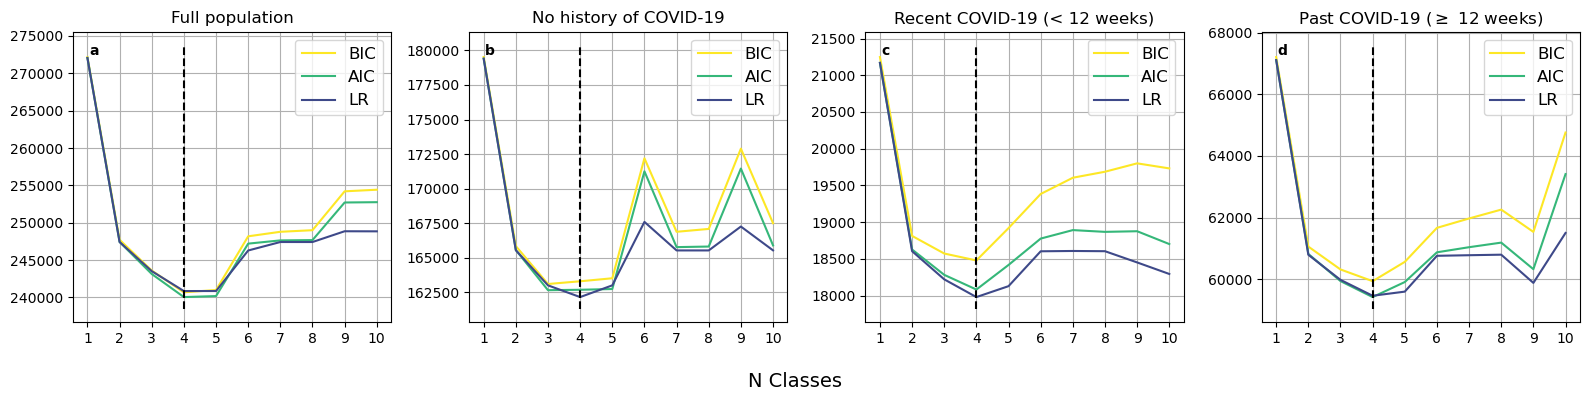

In [5]:
fig,ax_list = plt.subplots(1,4,figsize=(16,4), sharex=True,)

ax_list = np.ravel(ax_list)

titles = ['Full population',
          'No history of COVID-19','Recent COVID-19 (< 12 weeks)', 'Past COVID-19 ($\geq$ 12 weeks)']

n_cols = 10
cmap = mpl.colormaps['viridis_r']

# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, n_cols))
colors = [colors[0],colors[3],colors[7]]
letters=['a','b','c','d']
samples = ['all','nocovid','l12','g12']
for i,sample in enumerate(samples):
    
    ax = ax_list[i]
    
    df = lca.loc[lca['sample']==sample]
    df['LR'] = np.array(df['likelihood_ratio'].values) \
                        + (df.AIC.values[0]-df.likelihood_ratio.values[0])
    cols = ['BIC','AIC','LR']
    
    colordict  = dict(zip(cols,colors[1:]))

    if i==0:
        df[cols].plot(ax=ax, color=colors).legend(fontsize=12)  
    else:
        df[cols].plot(ax=ax, color=colors).legend(fontsize=12)  

    ax.grid()
    ax.set_xticks(np.arange(1,11))
    ax.set_xticklabels(np.arange(1,11))
    ax.set_title(titles[i], fontsize=12)
    
    if sample in ['l12','g12']:
        yl = ax.get_ylim()
        
        ax.plot(np.ones(10)*4, np.linspace(yl[0],yl[1],10), 'k--')
    else:
        yl = ax.get_ylim()
        
        ax.plot(np.ones(10)*4, np.linspace(yl[0],yl[1],10), 'k--')
    
    ax.text(0.05, 0.92, letters[i],
            fontweight='bold', transform=ax.transAxes)

fig.supxlabel('N Classes', fontsize=14)

plt.tight_layout()

plt.savefig(figure_dir + 'lca_performance.png',dpi=300)
plt.savefig(figure_dir + 'lca_performance.pdf')